## Landing Club Data Analysis

In [7]:
#! head data/LoanStats3b.csv

### 資料讀取與資料預處理
= https://drive.google.com/file/d/1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo/view?usp=sharing

In [8]:
?pd.read_csv

In [13]:
import pandas as pd
dataset = pd.read_csv('data/LoanStats3b.csv', skiprows=1)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [16]:
dataset = dataset.iloc[:,2:111] 

In [17]:
empty_cols = [i for i in range(45,72)]   

In [18]:
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)


In [19]:
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,Systems Engineer,3 years,...,0.0,3.0,100.0,100.0,0.0,0.0,233004.0,46738.0,14800.0,53404.0
1,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,...,0.0,1.0,100.0,25.0,0.0,0.0,138554.0,70186.0,35700.0,33054.0
2,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,LTC,10+ years,...,0.0,3.0,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0
3,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,Area Sales Manager,5 years,...,0.0,5.0,100.0,16.7,0.0,0.0,850886.0,199739.0,42200.0,196686.0
4,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,Project Manager,4 years,...,0.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0


In [21]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan], dtype=object)

In [22]:
data_with_loanstatus_sliced = dataset[dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [23]:
data_with_loanstatus_sliced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188171 entries, 0 to 188180
Data columns (total 82 columns):
loan_amnt                         188171 non-null float64
funded_amnt                       188171 non-null float64
funded_amnt_inv                   188171 non-null float64
term                              188171 non-null object
int_rate                          188171 non-null object
installment                       188171 non-null float64
grade                             188171 non-null object
sub_grade                         188171 non-null object
emp_title                         176434 non-null object
emp_length                        180284 non-null object
home_ownership                    188171 non-null object
annual_inc                        188171 non-null float64
verification_status               188171 non-null object
issue_d                           188171 non-null object
loan_status                       188171 non-null object
pymnt_plan                   

In [24]:
di = {"Fully Paid":0, "Charged Off":1}   
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"loan_status": di})

In [25]:
Dataset_withBoolTarget['loan_status'].unique()

array([0, 1])

In [34]:
dataset=Dataset_withBoolTarget 

In [35]:
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (188171, 82)


In [36]:
dataset.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       

In [37]:
del_col_names = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m", "num_accts_ever_120_pd", "delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"] 
dataset = dataset.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)


Current shape of dataset : (188171, 60)


In [38]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] #'sub_grade' #selecting final features #'addr_state''tax_liens',
Final_data = dataset[features] #19 features with target var
Final_data["int_rate"] = Final_data["int_rate"].apply(lambda x:float(x[:-1]) ) #reomving % sign, conv to float  - int_rate column
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)


Current shape of dataset : (188171, 18)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188171 entries, 0 to 188170
Data columns (total 18 columns):
funded_amnt              188171 non-null float64
emp_length               180284 non-null object
annual_inc               188171 non-null float64
home_ownership           188171 non-null object
grade                    188171 non-null object
last_pymnt_amnt          188171 non-null float64
mort_acc                 180676 non-null float64
pub_rec                  188171 non-null float64
int_rate                 188171 non-null float64
open_acc                 188171 non-null float64
num_actv_rev_tl          160430 non-null float64
mo_sin_rcnt_rev_tl_op    160429 non-null float64
mo_sin_old_rev_tl_op     160429 non-null float64
bc_util                  179059 non-null float64
bc_open_to_buy           179146 non-null float64
avg_cur_bal              160424 non-null float64
acc_open_past_24mths     180676 non-null float64
loan_status              188171 non-null int64
dtypes: floa

In [40]:
Final_data.select_dtypes('object').head()

,emp_length,home_ownership,grade
0,3 years,MORTGAGE,A
1,10+ years,OWN,B
2,10+ years,MORTGAGE,B
3,5 years,MORTGAGE,A
4,4 years,RENT,B


In [41]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})


In [43]:
Final_data["home_ownership"] =  Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})


In [44]:
Final_data["emp_length"] = Final_data["emp_length"].fillna('0')
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Final_data["emp_length"] = Final_data["emp_length"].apply(lambda x:int(x))
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (188171, 18)


In [45]:
Final_data.fillna(Final_data.mean(),inplace = True)
print("Current shape of dataset :",Final_data.shape)


Current shape of dataset : (188171, 18)


In [46]:
from sklearn import preprocessing,metrics 
scl = preprocessing.StandardScaler()  # (x - u) / std
fields = Final_data.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean['loan_status'] = Final_data['loan_status']
data_clean['loan_status'].value_counts()


0    158503
1     29668
Name: loan_status, dtype: int64

In [47]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]

In [48]:
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)


In [49]:
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])


In [50]:
len(data_clean)

11000

In [51]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)


Current shape of dataset : (11000, 18)


In [52]:
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-0.989391,-1.643158,-0.969274,0.882600,0.587619,-0.676664,0.553193,-0.261387,-0.290296,-0.651288,-1.363675,-7.431820e-02,-1.038796e+00,-2.164346,1.452250,-3.236691e-01,0.795272,1
1,0.665434,1.139246,-0.428992,-0.671988,0.587619,-0.599138,-0.842589,-0.261387,-0.263253,0.216861,0.000000,1.191238e-16,3.494532e-16,-0.955171,0.332384,-2.404980e-16,0.411179,1
2,1.099941,0.304525,-0.004484,0.882600,0.587619,-0.577991,-0.842589,-0.261387,-0.168600,0.650935,-0.250578,9.315927e-01,4.366386e-01,-1.457685,0.319938,-3.854796e-01,-0.741100,1
3,-0.043336,1.139246,0.198122,0.882600,-0.965556,-0.626038,2.414235,-0.261387,0.949202,1.085009,1.604583,-5.437433e-01,1.112880e+00,1.204071,-0.624680,6.145298e-01,0.795272,0
4,1.682366,0.861006,0.632277,0.882600,0.587619,-0.556044,0.553193,-0.261387,-0.707219,1.085009,2.346648,-2.755004e-01,3.006355e+00,0.175487,2.031358,7.294248e-01,0.411179,1


### 區分訓練與測試資料集

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)



### 建立模型

In [54]:
from sklearn import linear_model,svm
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)

rfe = RFE(clf_LR, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True False  True  True False False  True  True False  True
 False False  True False  True]
[1 1 1 8 1 1 7 4 1 1 5 1 3 2 1 6 1]


In [55]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))


Expected Variance is [0.16456115 0.15915564 0.12378805 0.07461597 0.07309735 0.05999203
 0.05780867 0.04724686 0.04252638 0.03925463]


In [56]:
features = ['funded_amnt','annual_inc','grade',"last_pymnt_amnt", "int_rate", "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy","acc_open_past_24mths","loan_status"]
X_train, X_test = X_train[features[:-1]], X_test[features[:-1]]
data_clean = data_clean[features]
print(X_train.shape)
print(data_clean.shape)


(8800, 10)
(11000, 11)


## 建立分類模型

In [71]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
preicted = clf.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preicted)

0.7945454545454546

In [65]:

from sklearn.model_selection import GridSearchCV

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    return mean_scores,grid.best_score_,grid.best_estimator_


In [63]:
logreg = linear_model.LogisticRegression(random_state=0)


In [75]:
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [76]:
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)



Best accuracy is 0.7986363636363636
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [77]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")


Logistic regression accuracy is  0.7945454545454546


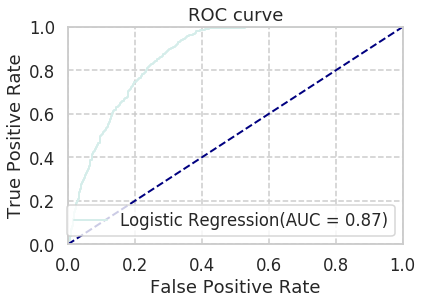

In [78]:
import numpy as np
from matplotlib import pyplot as plt
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()



### 使用SVM 建立模型

In [79]:
from sklearn.grid_search import GridSearchCV 
from sklearn import svm

clf_svm = svm.SVC()

powers = range(0,5)
cs = [10**i for i in powers]

param_grid = dict(C=cs)

grid = GridSearchCV(clf_svm, param_grid, cv=10, scoring='accuracy')

grid.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)

grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

print("---------------")
print(grid.best_estimator_)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


KeyboardInterrupt: 

SVM accuracy is  0.7645454545454545


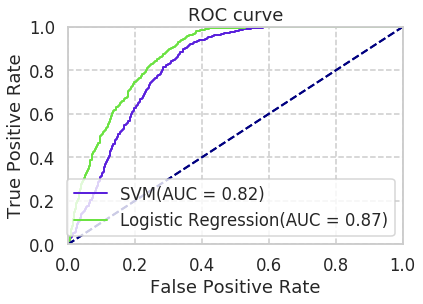

In [80]:
clf_svm = svm.SVC(kernel = "rbf", C=1000)
clf_svm.fit(X_train.iloc[:,:],y_train)
predictions_svm = clf_svm.predict(X_test.iloc[:,:])
predictproba_svm = clf_svm.decision_function(X_test.iloc[:,:])
SVM_Accuracy = accuracy_score(y_test,predictions_svm)
print("SVM accuracy is ",SVM_Accuracy)

plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import RandomizedSearchCV

rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,data_clean.shape[1]-1)
param_dist = dict(max_features=maxFeatures)

rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)

mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [82]:
from sklearn.metrics import accuracy_score
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
#產生預測結果
rfPredict = randomForest.predict(X_test)
rfAccuracy = accuracy_score(y_test,rfPredict)
print(rfAccuracy)


0.7822727272727272


In [84]:
rfPredictproba = randomForest.predict_proba(X_test)[:,1] 
roc_score = metrics.roc_auc_score(y_test,rfPredict)



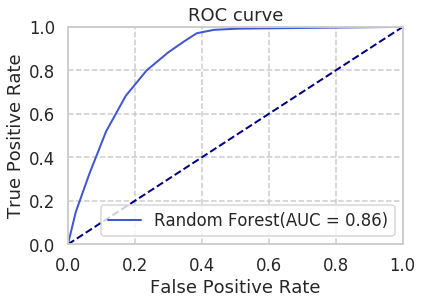

In [85]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()


In [86]:
randomForest.feature_importances_

array([0.07674452, 0.06796254, 0.02287923, 0.45605624, 0.08969091,
       0.05133422, 0.06065981, 0.06707113, 0.06758789, 0.04001351])

Text(0, 0.5, 'Normalized Gini Importance')

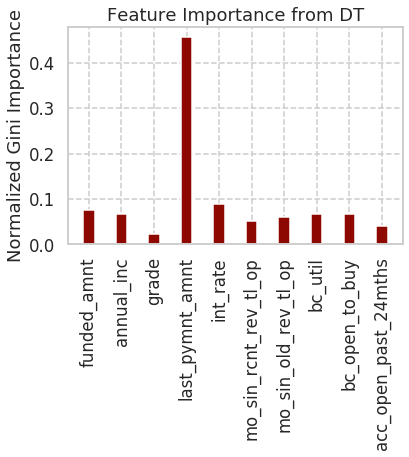

In [87]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)-1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')


In [88]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
num_trees = 100
model = BaggingClassifier(base_estimator=randomForest, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values, cv=kfold)
print(results.mean())


0.8042727272727273


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
Ada_clf = AdaBoostClassifier(n_estimators=50)
scores = cross_val_score(Ada_clf, data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
scores.mean()


0.8020932426893123

### XGBoost

In [90]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score

In [91]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [92]:
# use svmlight file for xgboost
dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

[15:55:44] 8800x10 matrix with 87669 entries loaded from dtrain.svm
[15:55:44] 2200x10 matrix with 21915 entries loaded from dtest.svm


In [93]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

#------------- numpy array ------------------
# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
preds[0:3,:]

array([[0.46013197, 0.539868  ],
       [0.99243224, 0.00756778],
       [0.46833408, 0.5316659 ]], dtype=float32)

In [94]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 0, 1, ..., 1, 0, 0])

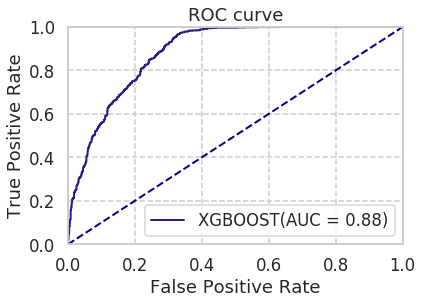

In [95]:
xgboost_predict = preds[:,1]
plotAUC(y_test,xgboost_predict,'XGBOOST')

In [96]:
from sklearn.metrics import classification_report
print("RF",classification_report(y_test, rfPredict, target_names=None))
print("SVM",classification_report(y_test, predictions_svm, target_names=None))
print("LR",classification_report(y_test, LR_Predict_bin, target_names=None))
#print("MLP",classification_report(y_test, predict_NN, target_names=None))


RF              precision    recall  f1-score   support

          0       0.79      0.77      0.78      1107
          1       0.77      0.80      0.78      1093

avg / total       0.78      0.78      0.78      2200

SVM              precision    recall  f1-score   support

          0       0.82      0.68      0.74      1107
          1       0.72      0.85      0.78      1093

avg / total       0.77      0.76      0.76      2200

LR              precision    recall  f1-score   support

          0       0.88      0.69      0.77      1107
          1       0.74      0.90      0.81      1093

avg / total       0.81      0.79      0.79      2200

